<p style="font-family: Arial; font-size:20pt;color:Darkblue; font-style:bold"><br>
Processo de Descoberta de Conhecimento
<br>

<img src="Processo_kdd_header.PNG">

<p style="font-family: Arial; font-size:20pt;color:Darkblue; font-style:bold"><br>
Coleta de Dados
<br>

<p style="font-family: Arial; font-size:14pt;color:#2462C0; font-style:bold"><br>

Introdução ao Pandas:
</p>

*Pandas* é uma biblioteca para análise de dados que oferece várias operações de exploração, limpeza e transformação que são cruciais ao trabalho com dados em Python. 

<b>Materiais adicionais recomendados:</b><br>
<a href="http://pandas.pydata.org/pandas-docs/stable/">Documentação Pandas</a><br>
<i>Python for Data Analysis</i> por Wes McKinney<br>
<i>Python Data science Handbook</i> por Jake VanderPlas

<p style="font-family: Arial; font-size:14pt;color:#2462C0; font-style:bold"><br>

Importação das bibliotecas
</p>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, Imputer, minmax_scale
import matplotlib.pyplot as plt

<p style="font-family: Arial; font-size:14pt;color:#2462C0; font-style:bold"><br>
Usando *pandas* para ler os arquivos.
</p>

Neste notebook usaremos 1 arquivos CSV:
* **adult.data :** *userId*,*movieId*,*rating*, *timestamp*

Usando o comando *read_csv* no *pandas*, iremos carregar estes três arquivos.

In [3]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html 
# sep: separador de valores no arquivo
# na_values: string que deve ser reconhecida como NaN na importação do arquivo
# skipinitialspace: desconsidera espaços em branco antes do separador ",".

df = pd.read_csv('./Datasets/adult.data', sep=',', na_values="?", skipinitialspace=True)
colunas = ['age', 'workclass','fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']
df.columns= colunas

# deletando colunas 
del df['fnlwgt']
del df['education-num']


In [4]:
# mostra as primeiras linhas do arquivo. Default 5, mas pode ser passado parametro.
df.head(10) 

# mostras as últimas linhas do arquivo. Default 5, mas pode ser passado parametro.
#df.tail()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


<p style="font-family: Arial; font-size:14pt;color:#2462C0; font-style:bold"><br>

Descrição do conjunto de dados:
</p>

O arquivo **adult.csv** é um conjunto de dados público, que está disponível em: https://archive.ics.uci.edu/ml/datasets/Adult

* **age**: atributo contínuo que representa a idade
* **workclass**: atributo categórico que representa a classe de trabalho
* **education**: atributo categórico que representa o nível de educação
* **marital-status**: atributo categórico que representa o estado civil
* **occupation**: atributo categórico que representa o cargo
* **relationship**: atributo categórico que representa o status de relacionamento
* **race**: atributo categórico que representa a raça
* **sex**:  atributo categórico que representa o sexo
* **capital-gain**: atributo contínuo que representa o ganho de capital
* **capital-loss**: atributo contínuo que representa a perda de capital
* **hours-per-week**: atributo contínuo que representa a quantidade de horas trabalhadas por semana
* **native-country**: atributo categórico que representa o país
* **class**: atributo que representa a classe (<=50K, >50K)


In [5]:
# contar a quantidade de linhas do arquivo
df.count()
#type(df)

age               32560
workclass         30724
education         32560
marital-status    32560
occupation        30717
relationship      32560
race              32560
sex               32560
capital-gain      32560
capital-loss      32560
hours-per-week    32560
native-country    31977
salary            32560
dtype: int64

<p style="font-family: Arial; font-size:20pt;color:Darkblue; font-style:bold"><br>
Pré-Processamento
<br>

<p style="font-family: Arial; font-size:14pt;color:#2462C0; font-style:bold"><br>
Análise dos tipos de dados
</p>

In [6]:
# lista os tipos das colunas do dataframe
df.dtypes

age                int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [7]:
# Ajusta o tipo dos atributos categóricos

df['race'] = df['race'].astype('category')
df['workclass'] = df['workclass'].astype('category')
df['education'] = df['education'].astype('category')
df['marital-status'] = df['marital-status'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['relationship'] = df['relationship'].astype('category')
df['sex'] = df['relationship'].astype('category')
df['native-country'] = df['native-country'].astype('category')
df['salary'] = df['salary'].astype('category')

In [8]:
df.dtypes

age                  int64
workclass         category
education         category
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
salary            category
dtype: object

In [9]:
# estatísticas sobre os atributos numéricos
df.describe()

,age,capital-gain,capital-loss,hours-per-week
count,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1077.615172,87.306511,40.437469
std,13.640642,7385.402999,402.966116,12.347618
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


<p style="font-family: Arial; font-size:14pt;color:#2462C0; font-style:bold"><br>
Análise de valores ausentes
</p>

In [10]:
# verifica se há valores ausentes nas colunas do dataframe
df.isna().any()

# retorna quantas linhas são ausentes
#df.isna().sum()

age               False
workclass          True
education         False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary            False
dtype: bool

In [11]:
# preenche os dados ausentes com o valor médio do atributo
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html
    
df = df.fillna(df.mean())

<p style="font-family: Arial; font-size:14pt;color:#2462C0; font-style:bold"><br>

Análise Exploratória

</p>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D818748>]],
      dtype=object)

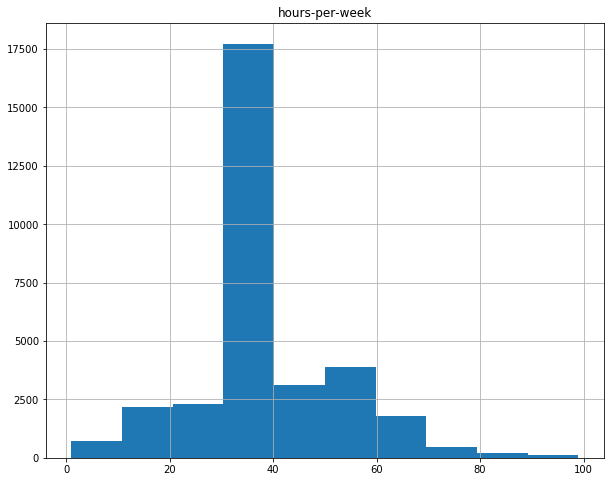

In [12]:
#comando que importa a biblioteca matplotlib 
%matplotlib inline

df.hist(column='hours-per-week', figsize=(10,8))

Text(0,0.5,'Proporcao da Populacao')

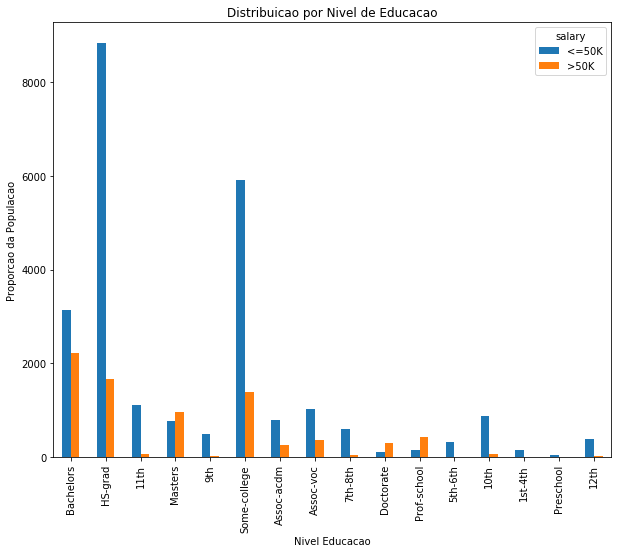

In [13]:
education = pd.crosstab(df.education, df.salary)

ax = education.plot(kind ='bar', title = 'Distribuicao por Nivel de Educacao', figsize = (10,8))
ax.set_xlabel('Nivel Educacao')
ax.set_ylabel('Proporcao da Populacao')

<p style="font-family: Arial; font-size:20pt;color:Darkblue; font-style:bold"><br>
Transformação
<br>

<p style="font-family: Arial; font-size:14pt;color:#2462C0; font-style:bold"><br>

Transformando dados categóricos
</p>

In [14]:
# usado para transformar labels nao-numericos em labels numericos

labelEncoder = LabelEncoder()
df['workclass'] = labelEncoder.fit_transform(df['workclass'].astype(str))
df['education'] = labelEncoder.fit_transform(df['education'].astype(str))
df['marital-status'] = labelEncoder.fit_transform(df['marital-status'].astype(str))
df['occupation'] = labelEncoder.fit_transform(df['occupation'].astype(str))
df['relationship'] = labelEncoder.fit_transform(df['relationship'].astype(str))
df['race'] = labelEncoder.fit_transform(df['race'].astype(str))
df['sex'] = labelEncoder.fit_transform(df['sex'].astype(str))
df['native-country'] = labelEncoder.fit_transform(df['native-country'].astype(str))



<p style="font-family: Arial; font-size:20pt;color:Darkblue; font-style:bold"><br>
Mineração de Dados
<br>

<p style="font-family: Arial; font-size:14pt;color:#2462C0; font-style:bold"><br>
Classificação utilizando Árvore de Decisão
</p>

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [15]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
X, y = df[df.columns[:-1]], df[df.columns[-1]]

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, stratify=y) 

In [18]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
predictions = dt.predict(X_test)

<p style="font-family: Arial; font-size:20pt;color:Darkblue; font-style:bold"><br>
Interpretação e Validação
<br>

In [20]:
print 'accuracy score:', accuracy_score(Y_test, predictions)

accuracy score: 0.8109336609336609
